In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [3]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [4]:
#Function to calculate the cost
def cost_function(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [5]:
#Partial derivates

def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i =  (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

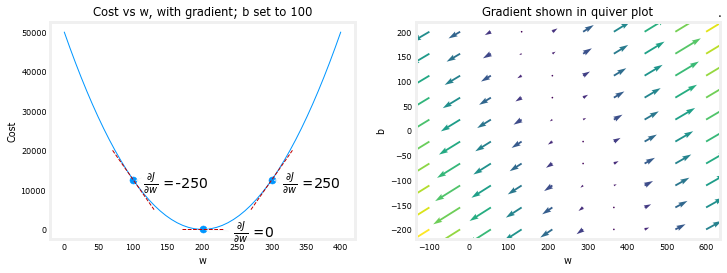

In [6]:
#Slope of the cost curve & "Quiver plot"
plt_gradients(x_train,y_train, cost_function, compute_gradient)
plt.show()

In [16]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, compute_gradient):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    w = copy.deepcopy(w_in) #avoid modifying global w_in
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        #Calculate the gradient and update the parameters using compute_gradient function
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        #Update the parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
    
        #Save cost J after each iteration:
        if i<100000: #prevent resource exhaustion
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        
        #Print cost at every 10 intervals or as many iterations if < 10
        
        if i% math.ceil(num_iters/10) ==0:
            print(f"Iteration {i:4}: Cost: {J_history[-1]:0.2e}",
                 f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db:0.3e}",
                 f"w:{w:0.3e}, b:{b:0.5e}")
            
    return w,b, J_history, p_history
        

In [17]:
#Initialize parameters

w_init = 0
b_init = 0

iterations = 1000
alpha = 1.0e-2

#Run gradient descent

w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, cost_function, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final: 8.4f})")

Iteration    0: Cost: 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w:6.500e+00, b:4.00000e+00
Iteration  100: Cost: 8.68e+01 dj_dw: -2.057e+01, dj_db: -1.111e+01 w:1.846e+02, b:1.12410e+02
Iteration  200: Cost: 1.10e+01 dj_dw: -1.273e+00, dj_db: 7.015e-01 w:1.907e+02, b:1.14646e+02
Iteration  300: Cost: 9.48e+00 dj_dw: -6.373e-01, dj_db: 9.896e-01 w:1.915e+02, b:1.13710e+02
Iteration  400: Cost: 8.19e+00 dj_dw: -5.757e-01, dj_db: 9.303e-01 w:1.921e+02, b:1.12748e+02
Iteration  500: Cost: 7.08e+00 dj_dw: -5.347e-01, dj_db: 8.651e-01 w:1.927e+02, b:1.11851e+02
Iteration  600: Cost: 6.12e+00 dj_dw: -4.971e-01, dj_db: 8.043e-01 w:1.932e+02, b:1.11017e+02
Iteration  700: Cost: 5.29e+00 dj_dw: -4.621e-01, dj_db: 7.477e-01 w:1.937e+02, b:1.10242e+02
Iteration  800: Cost: 4.57e+00 dj_dw: -4.296e-01, dj_db: 6.950e-01 w:1.941e+02, b:1.09521e+02
Iteration  900: Cost: 3.95e+00 dj_dw: -3.993e-01, dj_db: 6.461e-01 w:1.945e+02, b:1.08851e+02
(w,b) found by gradient descent: (194.9111,  108.2340)


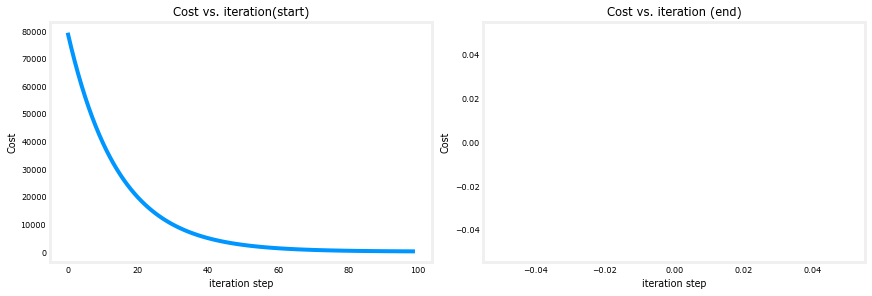

In [9]:
#Ploting cost vs iterations

# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [18]:
#Predictions

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} thousand $")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} thousand $")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} thousand $")

1000 sqft house prediction 303.1 thousand $
1200 sqft house prediction 342.1 thousand $
2000 sqft house prediction 498.1 thousand $


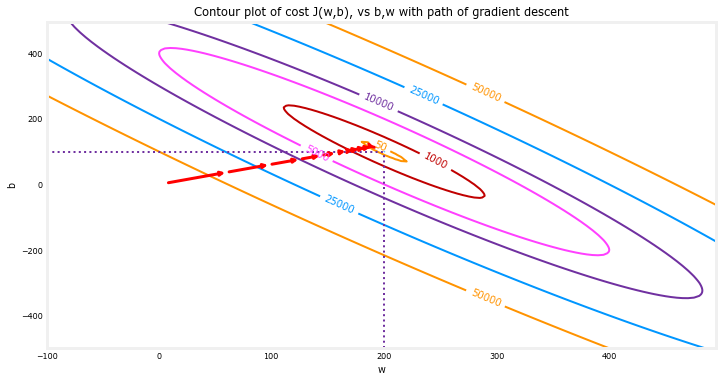

In [11]:
#Plotting

fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_history, ax)

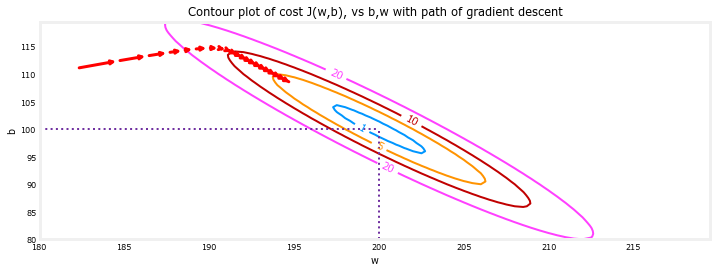

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_history, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [22]:
#Increasing Learning Rate Alpha (Note: each iteration ∂𝐽(𝑤,𝑏)∂𝑤 changes sign and cost is increasing rather than decreasing)

# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, alpha, 
                                                    iterations, cost_function, compute_gradient)

Iteration    0: Cost: 2.58e+05 dj_dw: -6.500e+02, dj_db: -4.000e+02 w:5.200e+02, b:3.20000e+02
Iteration    1: Cost: 7.82e+05 dj_dw:  1.130e+03, dj_db: 7.000e+02 w:-3.840e+02, b:-2.40000e+02
Iteration    2: Cost: 2.37e+06 dj_dw: -1.970e+03, dj_db: -1.216e+03 w:1.192e+03, b:7.32800e+02
Iteration    3: Cost: 7.19e+06 dj_dw:  3.429e+03, dj_db: 2.121e+03 w:-1.551e+03, b:-9.63840e+02
Iteration    4: Cost: 2.18e+07 dj_dw: -5.974e+03, dj_db: -3.691e+03 w:3.228e+03, b:1.98886e+03
Iteration    5: Cost: 6.62e+07 dj_dw:  1.040e+04, dj_db: 6.431e+03 w:-5.095e+03, b:-3.15579e+03
Iteration    6: Cost: 2.01e+08 dj_dw: -1.812e+04, dj_db: -1.120e+04 w:9.402e+03, b:5.80237e+03
Iteration    7: Cost: 6.09e+08 dj_dw:  3.156e+04, dj_db: 1.950e+04 w:-1.584e+04, b:-9.80139e+03
Iteration    8: Cost: 1.85e+09 dj_dw: -5.496e+04, dj_db: -3.397e+04 w:2.813e+04, b:1.73730e+04
Iteration    9: Cost: 5.60e+09 dj_dw:  9.572e+04, dj_db: 5.916e+04 w:-4.845e+04, b:-2.99567e+04


OverflowError: Python int too large to convert to C long

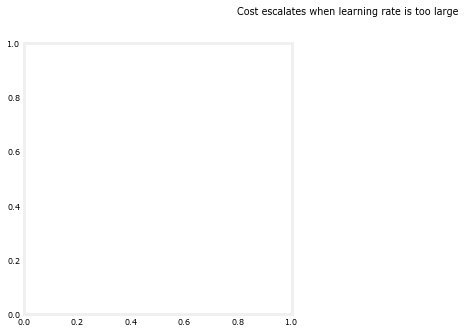

In [24]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()